In [1]:
import numpy as np
import pandas as pd

In [2]:
movierental = pd.read_excel('film_database.xlsx')

In [4]:
movierental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rental Date          16044 non-null  datetime64[ns]
 1   Film Title           16044 non-null  object        
 2   Genre                16044 non-null  object        
 3   Film Length          16044 non-null  int64         
 4   Rating               16044 non-null  object        
 5   Special Features     16044 non-null  object        
 6   Cost                 16044 non-null  float64       
 7   Customer First Name  16044 non-null  object        
 8   Customer Last Name   16044 non-null  object        
 9   Customer City        16044 non-null  object        
 10  Customer District    15944 non-null  object        
 11  Customer Country     16044 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 1.5+ MB


In [8]:
# Concat First Name and Last Name
movierental['Name'] = movierental['Customer First Name']+movierental['Customer Last Name']

In [10]:
# 1)  Calculate Receceny

from datetime import datetime
movierental['Recency']  = (datetime.now().date() - movierental['Rental Date'].dt.date) / np.timedelta64(1,'D')

In [12]:
movierental.head(2)

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country,Name,Recency
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran,TommyCollazo,1200.0
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka,ManuelMurrell,1200.0


In [13]:
# 2) Calculate Frequency 

freq_df = movierental.groupby('Name')['Film Title'].count().reset_index()

In [14]:
freq_df.head()

,Name,Film Title
0,AaronSelby,24
1,AdamGooch,22
2,AdrianClary,19
3,AgnesBishop,23
4,AlanKahn,26


In [15]:
freq_df.rename(columns={'Film Title': 'Frequency'},inplace=True)

In [16]:
movierental = movierental.merge(freq_df, on = 'Name', how = 'left')

In [17]:
movierental.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country,Name,Recency,Frequency
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran,TommyCollazo,1200.0,38
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka,ManuelMurrell,1200.0,30
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew,Purdy,Baku,Baki,Azerbaijan,AndrewPurdy,1200.0,27
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores,Hansen,Jaroslavl,Jaroslavl,Russian Federation,DeloresHansen,1200.0,21
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson,Christenson,Santiago de Compostela,Galicia,Spain,NelsonChristenson,1200.0,20


In [18]:
# 3) Calculate Monetary value
monetary = movierental.groupby('Name')['Cost'].sum().reset_index()

In [19]:
monetary.rename(columns = {'Cost':'MonetaryValue'},inplace=True)

In [20]:
monetary.head()

,Name,MonetaryValue
0,AaronSelby,85.76
1,AdamGooch,73.78
2,AdrianClary,50.81
3,AgnesBishop,74.77
4,AlanKahn,77.74


In [22]:
movierental = movierental.merge(monetary, on = 'Name', how = 'left')

In [23]:
movierental.head(3)

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country,Name,Recency,Frequency,MonetaryValue
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran,TommyCollazo,1200.0,38,131.62
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka,ManuelMurrell,1200.0,30,91.70
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew,Purdy,Baku,Baki,Azerbaijan,AndrewPurdy,1200.0,27,72.73


In [24]:
# Define Scales for RFM Value or RFM Score

recency_scale = [5,4,3,2,1]
frequency_scale = [1,2,3,4,5]
monetary_scale  = [1,2,3,4,5]

In [25]:
# Calculating Recency Score 

movierental['RecencyScore'] = pd.cut(movierental.Recency, bins = 5, labels=recency_scale)

In [26]:
# Calculating Frequency Score
movierental['FrequencyScore'] = pd.cut(movierental.Frequency, bins = 5, labels=frequency_scale)

In [27]:
# Calculating Monetory Score
movierental['MonetaryScale'] = pd.cut(movierental.MonetaryValue, bins = 5, labels=monetary_scale)

In [28]:
movierental.head()

,Rental Date,Film Title,Genre,Film Length,Rating,Special Features,Cost,Customer First Name,Customer Last Name,Customer City,Customer District,Customer Country,Name,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScale
0,2020-05-24 22:54:33,Freaky Pocus,Music,126,R,"Trailers, Behind the Scenes",2.99,Tommy,Collazo,Qomsheh,Esfahan,Iran,TommyCollazo,1200.0,38,131.62,1,4,5
1,2020-05-24 23:03:39,Graduate Lord,Children,156,G,"Trailers, Behind the Scenes",2.99,Manuel,Murrell,Jaffna,Northern,Sri Lanka,ManuelMurrell,1200.0,30,91.70,1,3,3
2,2020-05-24 23:04:41,Love Suicides,Horror,181,R,"Trailers, Behind the Scenes",0.99,Andrew,Purdy,Baku,Baki,Azerbaijan,AndrewPurdy,1200.0,27,72.73,1,3,2
3,2020-05-24 23:05:21,Idols Snatchers,Children,84,NC-17,Trailers,2.99,Delores,Hansen,Jaroslavl,Jaroslavl,Russian Federation,DeloresHansen,1200.0,21,50.79,1,2,2
4,2020-05-24 23:08:07,Mystic Truman,Comedy,92,NC-17,"Commentaries, Behind the Scenes",0.99,Nelson,Christenson,Santiago de Compostela,Galicia,Spain,NelsonChristenson,1200.0,20,61.80,1,2,2


In [29]:
movierental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 0 to 16043
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rental Date          16044 non-null  datetime64[ns]
 1   Film Title           16044 non-null  object        
 2   Genre                16044 non-null  object        
 3   Film Length          16044 non-null  int64         
 4   Rating               16044 non-null  object        
 5   Special Features     16044 non-null  object        
 6   Cost                 16044 non-null  float64       
 7   Customer First Name  16044 non-null  object        
 8   Customer Last Name   16044 non-null  object        
 9   Customer City        16044 non-null  object        
 10  Customer District    15944 non-null  object        
 11  Customer Country     16044 non-null  object        
 12  Name                 16044 non-null  object        
 13  Recency              16044 non-

In [30]:
movierental.RecencyScore  = movierental.RecencyScore.astype(int)
movierental.FrequencyScore = movierental.FrequencyScore.astype(int)
movierental.MonetaryScale = movierental.MonetaryScale.astype(int)

In [31]:
# Creating RFM_Score

movierental['RFM_Score'] = movierental.RecencyScore + movierental.FrequencyScore + movierental.MonetaryScale

In [32]:
# Create a New Variable - Customer_segment
segment_labels = ['Low_Value','Medium_Value','High_Value']
movierental['Customer_Segment'] = pd.qcut(movierental.RFM_Score, q=3, labels = segment_labels)

In [33]:
movierental.Customer_Segment.value_counts()

Medium_Value    7668
Low_Value       5430
High_Value      2946
Name: Customer_Segment, dtype: int64

In [35]:
rfm_segments = []
for row in movierental.RFM_Score:
    if row >= 9:
        rfm_segments.append('Champions')
    elif row >= 6:
        rfm_segments.append('Loyalists')
    elif row >= 5:
        rfm_segments.append('At Risk')
    elif row >= 4:
        rfm_segments.append("Can't Lose")
    else:
        rfm_segments.append('Lost')
        
movierental['RFM_Segment'] = rfm_segments

In [36]:
movierental.RFM_Segment.value_counts(dropna=False)

Loyalists     10928
Champions      2946
At Risk        1744
Can't Lose      302
Lost            124
Name: RFM_Segment, dtype: int64

In [37]:
loyal = movierental[movierental.RFM_Segment == 'Loyalists']

In [38]:
loyal[['Recency','Frequency','MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,10928.000000,10928.000000,10928.000000
mean,1140.611640,27.204795,79.701781
std,25.726774,3.374245,11.685879
min,934.000000,17.000000,47.800000
25%,1114.000000,25.000000,70.730000
50%,1134.000000,27.000000,79.760000
75%,1156.000000,30.000000,88.710000
max,1200.000000,36.000000,111.680000


<Axes: >

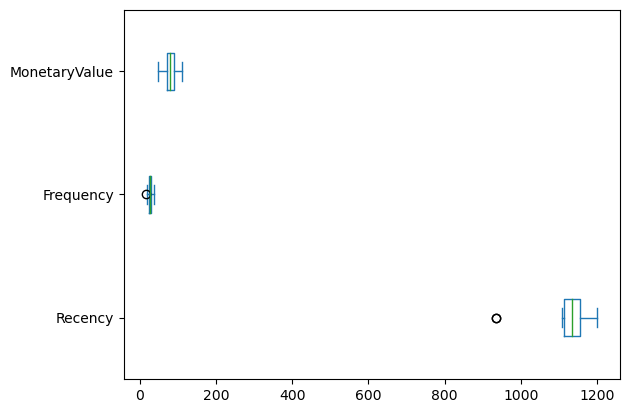

In [39]:
loyal[['Recency','Frequency','MonetaryValue']].plot(kind='box',vert=False)

In [43]:
loyal['Customer City'].value_counts()

Aurora            48
London            37
Poos de Caldas    32
Sasebo            32
Daxian            32
                  ..
Tarlac             7
Bhopal             7
Sao Paulo          1
Bat Yam            1
Matsue             1
Name: Customer City, Length: 517, dtype: int64

In [45]:
pd.crosstab(movierental['Customer City'],movierental.RFM_Segment).nlargest(10,columns='Loyalists')

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
Customer City,,,,,
Aurora,0,0,2,0,48
London,9,0,2,0,37
Chandrapur,0,0,0,0,32
Charlotte Amalie,0,0,0,0,32
Daxian,0,0,1,0,32
Greensboro,0,0,0,0,32
Jamalpur,0,0,0,0,32
Jastrzebie-Zdrj,0,0,0,0,32
La Plata,0,0,0,0,32


In [46]:
pd.crosstab(movierental['Customer City'],movierental.RFM_Segment).nlargest(10,columns='Champions')

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
Customer City,,,,,
Saint-Denis,0,0,46,0,0
Cape Coral,0,0,45,0,0
Molodetno,0,0,42,0,0
Tanza,0,0,42,0,0
Changhwa,0,0,41,0,0
Changzhou,0,0,40,0,0
Ourense (Orense),0,0,40,0,0
Apeldoorn,0,0,39,0,0
Bijapur,0,0,39,0,0


In [47]:
pd.crosstab(movierental.Name, movierental.RFM_Segment).nlargest(10,columns='Loyalists')

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
Name,,,,,
FrankWaggoner,0,0,0,0,32
GlendaFrazier,0,0,0,0,32
JavierElrod,0,0,0,0,32
JudithCox,0,0,1,0,32
JuliaFlores,0,0,0,0,32
LeroyBustamante,0,0,0,0,32
MarjorieTucker,0,0,0,0,32
MarySmith,0,0,0,0,32
MaxineSilva,0,0,0,0,32
